In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [2]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    Derivative,
    together,
    Poly,
    I,
    pi
)
from sympy.core.numbers import NegativeOne, One, Zero
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing(use_latex='mathjax') 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

# Polynomials invariant under rotations

https://math.stackexchange.com/questions/3211530/invariant-polynomials-under-rotations

## Definitions
First we need to define which rotation we are considering. Therefor we fix $n\geq 0$ and define the rotation map:
$$R: \mathbb{R}^2 \rightarrow \mathbb{R},\quad R = 
\begin{pmatrix}
\cos{\left(\frac{2\pi}{n}\right)} & -\sin{\left(\frac{2\pi}{n}\right)}\\
\sin{\left(\frac{2\pi}{n}\right)} &  \cos{\left(\frac{2\pi}{n}\right)}\\
\end{pmatrix}$$

Let us now define the space of all two-variable real polynomials by $\mathbb{R}[x,y]$, and $P \in \mathbb{R}[x,y]$ as a function
$P:\mathbb{R}^2 \rightarrow \mathbb{R}$. Let now $L$ be a linear map defined such that:
$$L:\mathbb{R}[x,y] \rightarrow \mathbb{R}[x,y], \quad LP=P \circ R.$$



## Invariance under $L$
A polynomial $Q$ is then invariant when $LQ=Q$, i.e. $Q$ is an eigenvector of $L$ with eigenvalue 1. In other words we are looking for the 1-eigenspace of $L$.

Let $\mathbb{R}[x,y]_d$ be the subspace of all homogenous degree-$d$ polynomials. As an example consider:
$$\mathbb{R}[x,y]_3=\text{span}\lbrace x^3,x^2y,xy^2,y^3 \rbrace.$$

Notice that $L\left( \mathbb{R}[x,y]_d \right) \subseteq \mathbb{R}[x,y]_d$. This allows the investigation of $L$ on each degree-$d$ subspace individually, which we denote by $L_d:\mathbb{R}[x,y]_d  \rightarrow \mathbb{R}[x,y]_d$.

## Eigenvalues of $L_d$

If $\lambda,\mu$ are the eigenvalues of $R$, then the eigenvalues of $L_d$ must be:
$$\lambda^d, \lambda^{d-1}\mu,\cdots,\lambda\mu^{d-1},\mu^d.$$

You can see this by changing to the complex plane where $R$ diagonalizes, with some eigenvectors $u,v$ corresponding to $\lambda$ and $\mu$. After coordinate transforming to $(u,v)$ we have 
:
$$L(u^av^b)=\lambda^a\mu^bu^av^b,$$
etc... But we know exactly the eigenvalues of $R$: $\omega$ and $\omega^{-1}$, with $\omega=\exp{\left( \frac{2 \pi i}{n}\right)}$. A primitive nth root of unity. So the eigenvalues are 
$$\color{red}{\omega^{-d},\omega^{-d+2},\cdots, \omega^{d-2},\omega^d}.$$

The dimension of the 1-eigenspace of $L_d$ is the same as the number of eigenvalues that are equal to 1, and $\omega^i=1$ exactly when n divides i.

## Subspace of invariant polynomials for specific n of at most degree d

Let us first tabulate the eigenvalues of the operators $L_0,L_1,\cdots,L_d$.

$$
\begin{array}{l|ccccccccccc}
L_0&&&&&&\omega^0&&&&& \\
L_1&&&&&\omega^{-1}&&\omega^{1}&&&& \\
L_2&&&&\omega^{-2}&&\omega^0&&\omega^{2}&&& \\
L_3&&&\omega^{-3}&&\omega^{-1}&&\omega^{1}&&\omega^{3}&& \\
L_4&&\omega^{-4}&&\omega^{-2}&&\omega^0&&\omega^{2}&&\omega^{4}& \\
L_5&\omega^{-5}&&\omega^{-3}&&\omega^{-1}&&\omega^{1}&&\omega^{3}&& \omega^{5}
\end{array}
$$

Take now $n=3$ and $d\leq 5$, then the $\omega^i$ in the table above for which 3 divides $i$ are the answer. 

## Invariant functions 
$L_0$ is a constant function.
After that the middle column are even power of the length function $\sqrt{x^2+y^2}$, i.e. $x^2+y^2, x^4+2x^2y^2+y^4$ and so on. For the uneven powers (see further) consider $\omega^3,\omega^{-3}$ for which the functions $x^3-3xy^2,3x^2y-y^3$ are invariant.

Since
$$L(u^av^b)=\omega^{a-b}u^av^b$$ 
the condition for invariance is that $a-b$ has to be divisible by $n$.

Consider again $n=3$, then we have the two monomials $u^3,v^3$, but $u=x+iy,v=x-iy$ so one can not extract the invariant polynomials directly. But we can look at the real and imaginary part of $u^3+v^3$.

In [3]:
x,y, px, py = symbols("x y p_x p_y", real=True)

# Function to get polynomials

In [66]:
def getpoly(u,v, symorder, porder):
    so=symorder
    o=porder
    
    pols = []
    for a in range(5):
        for b in range(5):
            if (a-b) % so == 0 and (a +b <= o):
#                 print(a,b,a-b)
                ex = (u3**a*v3**b).expand().as_real_imag()
                if ex[0] !=0 : pols.append( ex[0] )
                if ex[1] !=0 : pols.append( ex[1] )

    # remove double entries with opposite sign
    new_pols = []
    for p in pols:
        if (p in new_pols) or (-p in new_pols):
            continue
        new_pols.append(p)

    return new_pols

In [53]:
def RotationMatrix2D(angle):
    R = Matrix([[cos(angle),-sin(angle)],[sin(angle),cos(angle)]])
    return R

In [69]:
def explicitCheck(new_pols, rot_rep):
    for i,p in enumerate(new_pols):
        if p == p.subs(rot_rep).expand():
            display(p)
        else:
            print("{} nok".format(p))

# Explicit examples

## C2

In [65]:
# define rotation matrix
R2 = RotationMatrix2D(2*pi/2)

# define effect of rotation for substition in equations
tr      = R2 * Matrix([[px],[py]])
rot_rep = list(zip([x,y,px,py],[tr[0],tr[1],x,y]))
tr.subs(rot_rep)

⎡-x⎤
⎢  ⎥
⎣-y⎦

In [55]:
# eigen vectors of the transformation
eig2 = R2.eigenvects()
eig2

⎡⎛       ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜-1, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦  ⎣1⎦⎦⎠⎦

In [56]:
# set eigenvalues manually
u2 = x
v2 = y

In [67]:
# get invariant polynomials
getpoly(u2, v2,symorder=2, porder=4)

⎡      2    2          4      2  2    4       3          3   2    2     4    4
⎣1, - x  + y , 2⋅x⋅y, x  - 6⋅x ⋅y  + y , - 4⋅x ⋅y + 4⋅x⋅y , x  + y , - x  + y 

     3          3   4      2  2    4⎤
, 2⋅x ⋅y + 2⋅x⋅y , x  + 2⋅x ⋅y  + y ⎦

In [70]:
# double check invariance explicitly - prints expression if invariant and nok message if not invariant
explicitCheck(getpoly(u2, v2,symorder=2, porder=4), rot_rep)

1

   2    2
- x  + y 

2⋅x⋅y

 4      2  2    4
x  - 6⋅x ⋅y  + y 

     3          3
- 4⋅x ⋅y + 4⋅x⋅y 

 2    2
x  + y 

   4    4
- x  + y 

   3          3
2⋅x ⋅y + 2⋅x⋅y 

 4      2  2    4
x  + 2⋅x ⋅y  + y 

## C3

In [71]:
# define rotation matrix
R3 = RotationMatrix2D(2*pi/3)

# define effect of rotation for substition in equations
tr      = R3 * Matrix([[px],[py]])
rot_rep = list(zip([x,y,px,py],[tr[0],tr[1],x,y]))
tr.subs(rot_rep)

# eigen vectors of the transformation
eig3 = R3.eigenvects()
eig3

⎡⎛  1   √3⋅ⅈ     ⎡⎡-ⅈ⎤⎤⎞  ⎛  1   √3⋅ⅈ     ⎡⎡ⅈ⎤⎤⎞⎤
⎢⎜- ─ - ────, 1, ⎢⎢  ⎥⎥⎟, ⎜- ─ + ────, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝  2    2       ⎣⎣1 ⎦⎦⎠  ⎝  2    2       ⎣⎣1⎦⎦⎠⎦

In [72]:
u3  =  (eig3[0][2][0].T *Matrix([x,y]))[0]
v3  =  (eig3[1][2][0].T *Matrix([x,y]))[0]
u3,v3

(-ⅈ⋅x + y, ⅈ⋅x + y)

In [75]:
getpoly(u3, v3,symorder=3, porder=6)

⎡        2      3     3        2   2    2       4        2  3    5     5      
⎣1, - 3⋅x ⋅y + y , - x  + 3⋅x⋅y , x  + y , - 3⋅x ⋅y - 2⋅x ⋅y  + y , - x  + 2⋅x

3  2        4   4      2  2    4   6      4  2      2  4    6⎤
 ⋅y  + 3⋅x⋅y , x  + 2⋅x ⋅y  + y , x  + 3⋅x ⋅y  + 3⋅x ⋅y  + y ⎦

In [76]:
# double check invariance explicitly - prints expression if invariant and nok message if not invariant
explicitCheck(getpoly(u3, v3,symorder=3, porder=6), rot_rep)

1

     2      3
- 3⋅x ⋅y + y 

   3        2
- x  + 3⋅x⋅y 

 2    2
x  + y 

     4        2  3    5
- 3⋅x ⋅y - 2⋅x ⋅y  + y 

   5      3  2        4
- x  + 2⋅x ⋅y  + 3⋅x⋅y 

 4      2  2    4
x  + 2⋅x ⋅y  + y 

 6      4  2      2  4    6
x  + 3⋅x ⋅y  + 3⋅x ⋅y  + y 

In [86]:
Poly(getpoly(u3, v3,symorder=3, porder=6)[4]).as_expr().subs(rot_rep).expand()

     4        2  3    5
- 3⋅x ⋅y - 2⋅x ⋅y  + y 

<IPython.core.display.Javascript object>


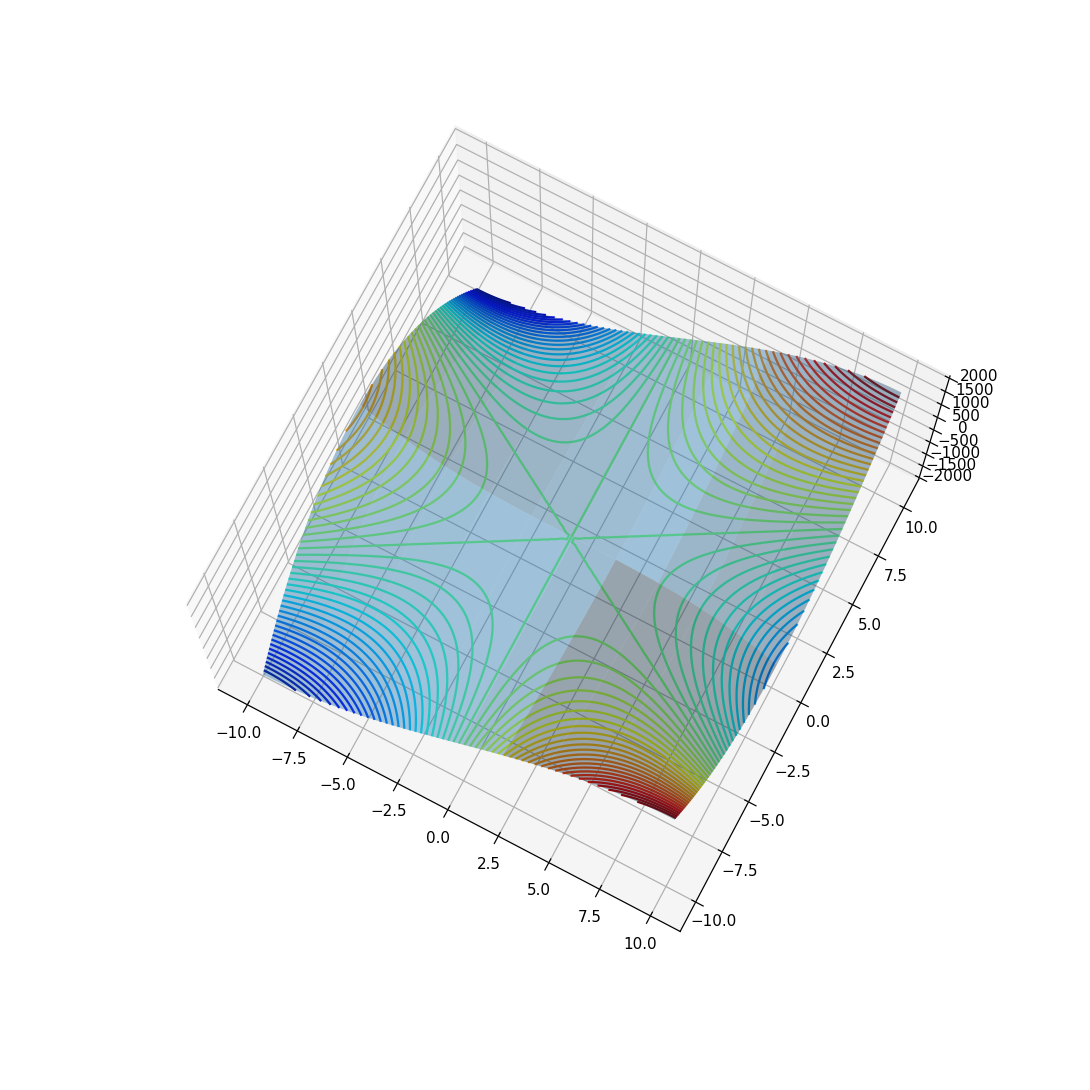

In [87]:
n   =   3
lim =  10
num = 100

f = lambdify((x,y),Poly(getpoly(u3, v3,symorder=3, porder=6)[2]).as_expr(),"numpy")

X = np.linspace(-lim,lim,num)
P = np.linspace(-lim,lim,num)

XX,PP =np.meshgrid(X,P)

fig = plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')

ax.plot_surface(XX,PP,f(XX,PP),alpha=.4,rstride=50)
ax.contour(XX,PP,f(XX,PP),levels=50,cmap="jet")

plt.show()